<function matplotlib.pyplot.show(close=None, block=None)>

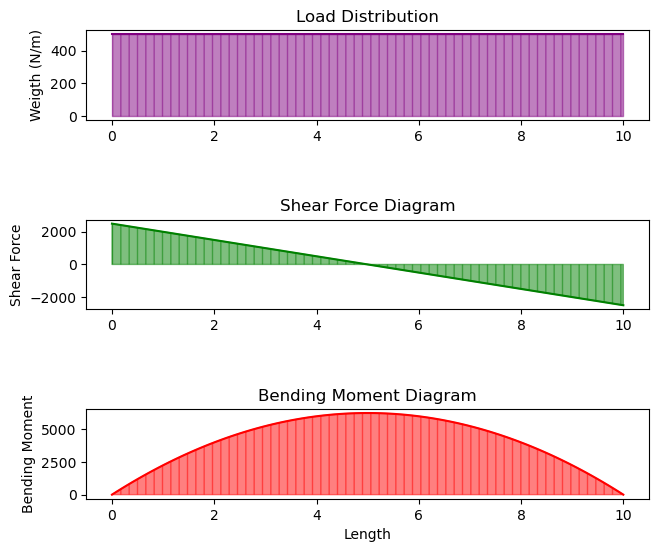

In [123]:
import numpy as np
import matplotlib.pyplot as plt

l = 10 # length of beam
udl = 500 # N/m

# Reactions
R = udl*l/2
x = np.linspace(0,l,100)

W = []
X = []
SF = []
M = []

for y in x:
    Mx = (R*y) - udl*(y**2/2)
    sf = R - (udl*y)
    
    X.append(y)
    W.append(udl)
    M.append(Mx)
    SF.append(sf)
    
plt.figure(figsize=(7.5,6), dpi=100)

plt.subplot(3,1,1)
plt.plot(X,W,'purple')
plt.fill_between(X,W,color='purple',alpha=0.5,hatch="||")
plt.title("Load Distribution")
plt.ylabel("Weigth (N/m)")
plt.tight_layout(pad=4.0)

plt.subplot(3,1,2)
plt.plot(X,SF,'green')
plt.fill_between(X,SF,color='green',alpha=0.5,hatch="||")
plt.title("Shear Force Diagram")
plt.ylabel("Shear Force")
plt.tight_layout(pad=4.0)

plt.subplot(3,1,3)
plt.plot(X,M,'red')
plt.fill(X,M, color='red', alpha=0.5, hatch="||")
plt.title("Bending Moment Diagram")
plt.xlabel("Length")
plt.ylabel("Bending Moment")


plt.show

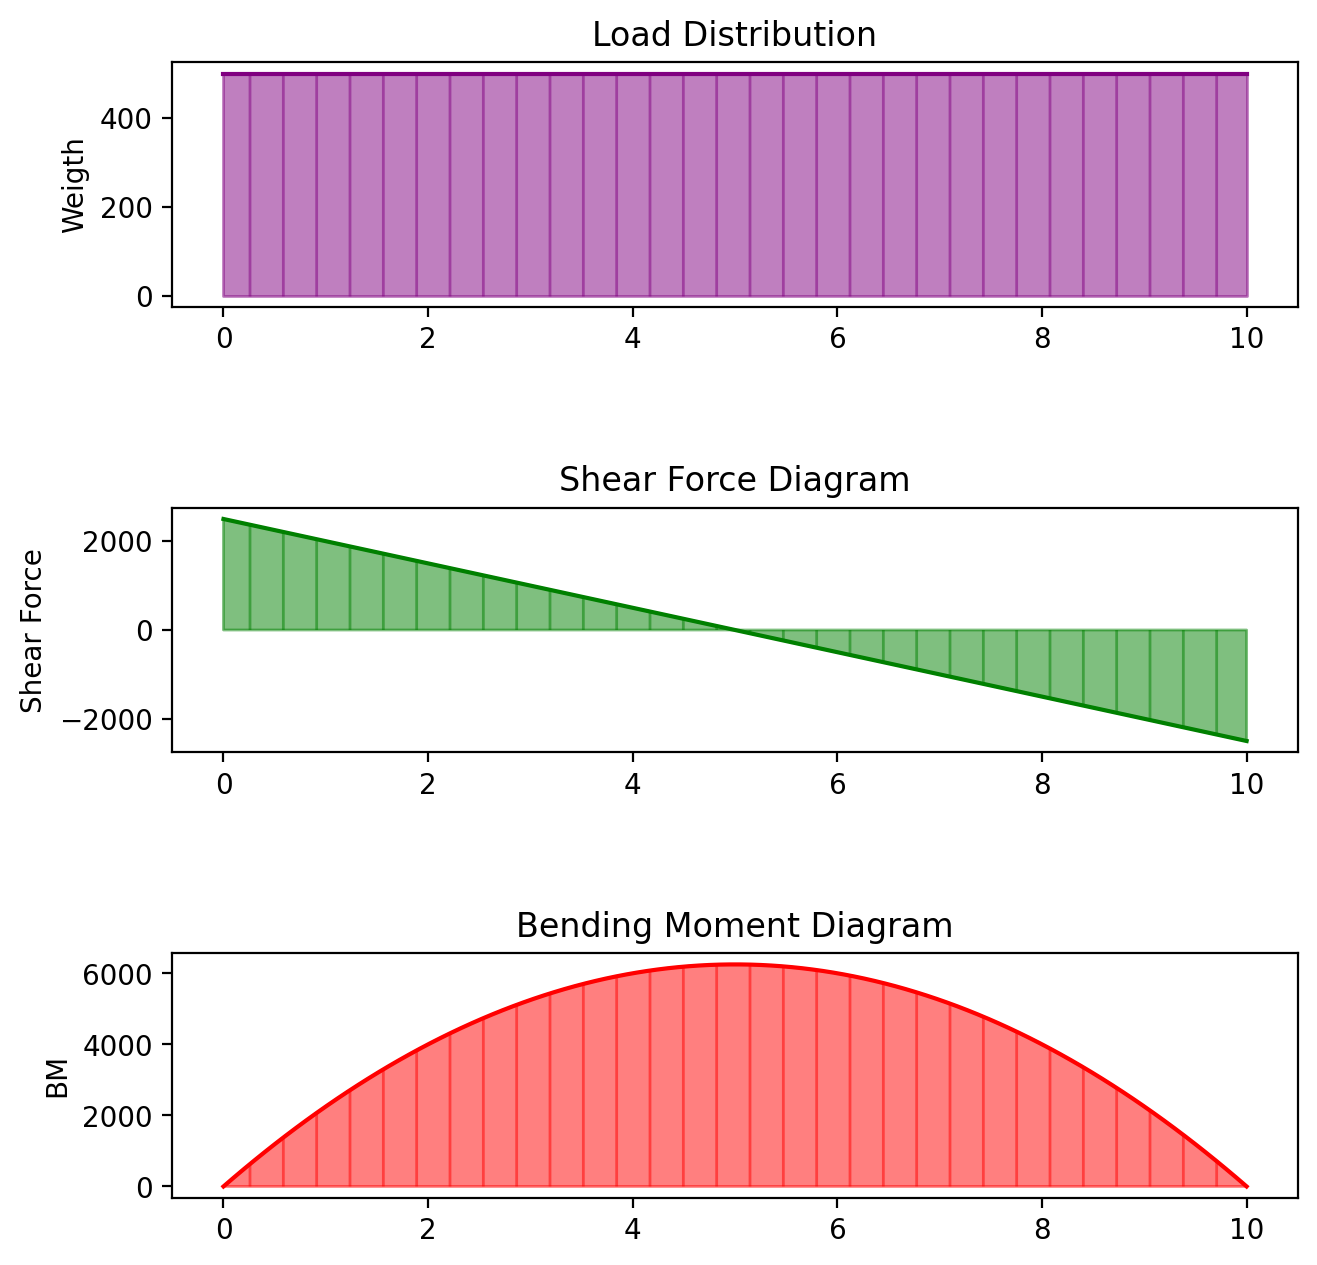

In [114]:
import numpy as np
import matplotlib.pyplot as plt

# inputs
L= 10 # m
w = 500  # N/m

# Reaction
R = w*L/2
x = np.linspace(0,L,100)

X = []
W = []
SF = []
M = []

for l in x:
    sf = R - (w*l)
    m = (R*l) - (w*l**2/2)
    X.append(l)
    W.append(w)
    SF.append(sf)
    M.append(m)

plt.figure(figsize=(7.5,7), dpi=200)

plt.subplot(3,1,1)
plt.plot(X,W,'purple')
plt.fill_between(X,W,color='purple',alpha=0.5,hatch="|")
plt.title("Load Distribution")
plt.ylabel("Weigth (N/m)")
plt.tight_layout(pad=4.0)

plt.subplot(3,1,2)
plt.plot(X,SF, color='green')
plt.fill_between(X,SF,color="green", alpha=0.5, hatch="|")
plt.title("Shear Force Diagram")
plt.ylabel("Shear Force")
plt.tight_layout(pad=4.0)

plt.subplot(3,1,3)
plt.plot(X,M, color='red')
plt.fill_between(X,M,color="r", alpha=0.5, hatch="|")
plt.title("Bending Moment Diagram")
plt.ylabel("BM")
plt.show()
    

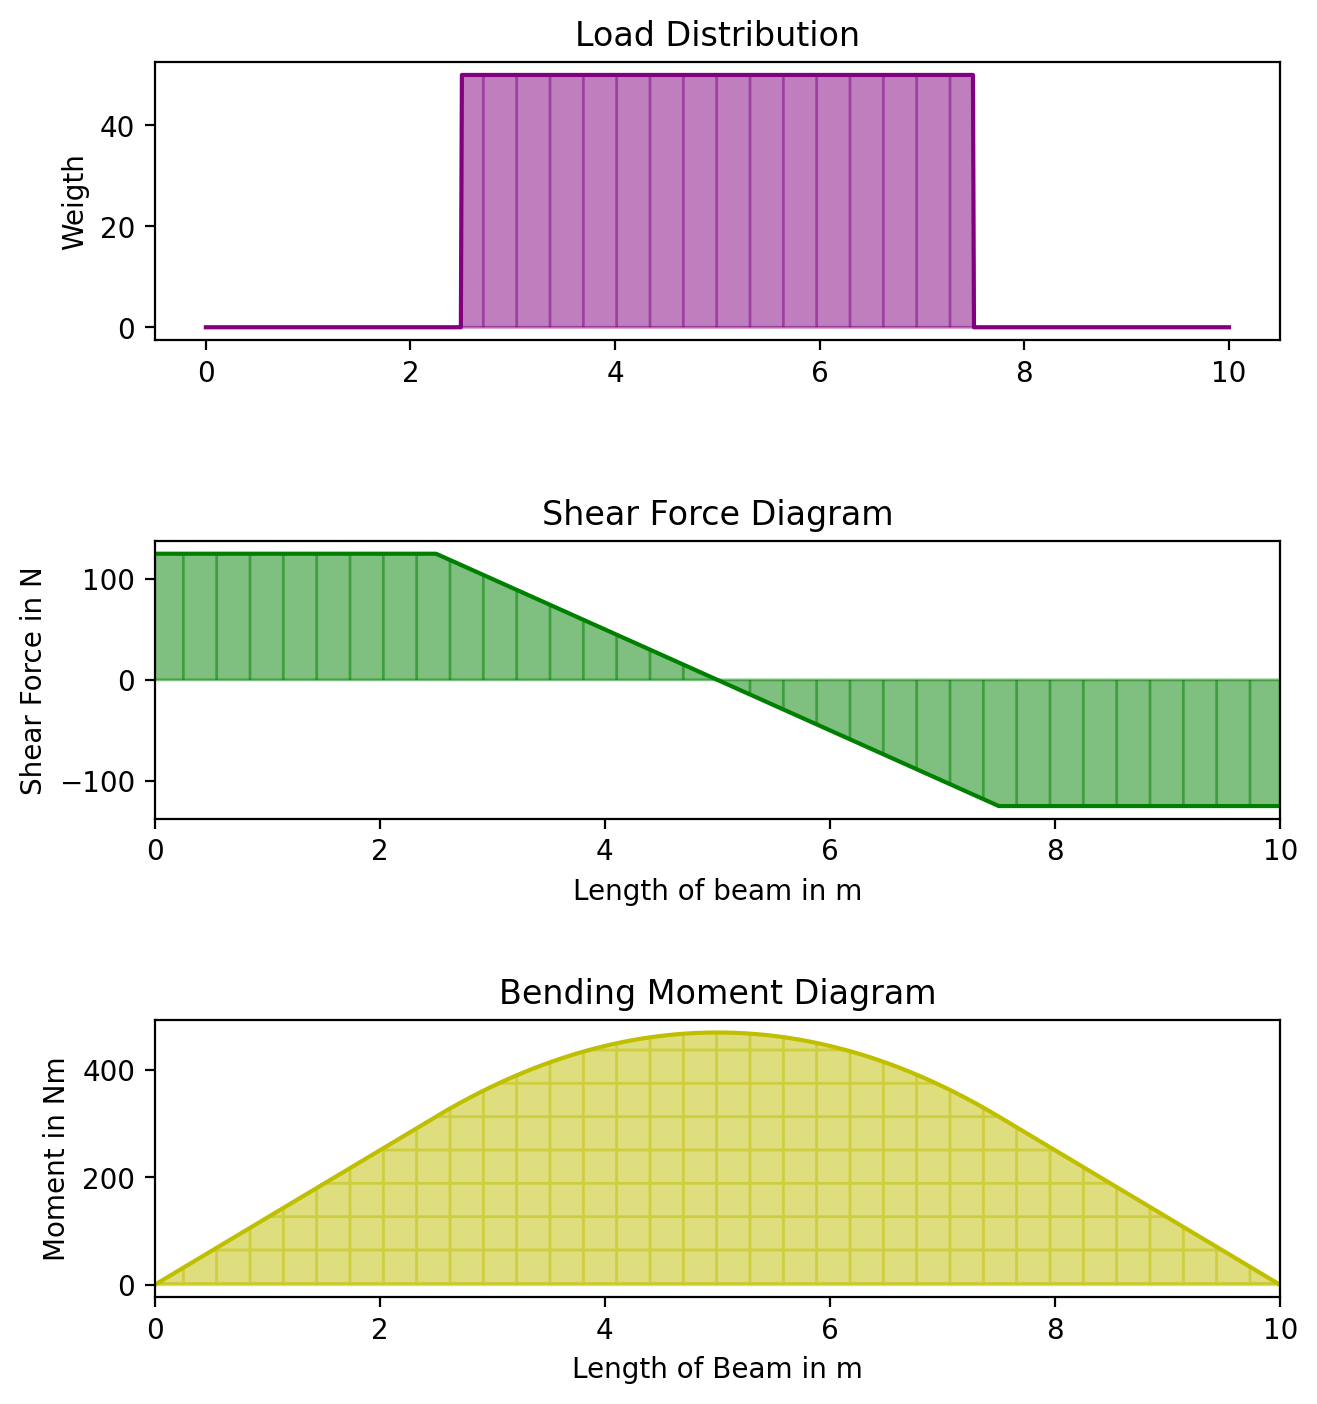

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# inputs
w = 50  # N/m
L= 10 # m


a = 2.5
b = 5
c = L - (a+b)

R1 = (w*b/L)*(c + b/2)
R2 = (w*b/L)*(a + b/2)
l = np.linspace(0,L,1000)

X = []
W = []
SF = []
M = []

for x in l:
    if x<a:
        sf = R1
        m = R1*x
        udl = 0
    elif a < x < (a+b):
        sf = R1 - w*(x-a)
        m = (R1*x)-w*(x-a)**2/2
        udl = w
    elif x > (a+b):
        sf = -R2
        m = R2*(L-x)
        udl = 0
    
    X.append(x)
    W.append(udl)
    SF.append(sf)
    M.append(m)
    
plt.figure(figsize=(7.5,7.5), dpi=200)

plt.subplot(3,1,1)
plt.plot(X,W,'purple')
plt.fill_between(X,W,color='purple',alpha=0.5,hatch="|")
plt.title("Load Distribution")
plt.ylabel("Weigth (N/m)")
plt.tight_layout(pad=4.0)

plt.subplot(3,1,2)
plt.plot(X,SF, color='g')
plt.fill_between(X,SF, color='g', hatch='|', alpha=0.5)
plt.title('Shear Force Diagram')
plt.xlabel('Length of beam in m')
plt.ylabel('Shear Force in N')
plt.xlim(0,L)

plt.tight_layout(pad=4.0)
plt.subplot(3,1,3)
plt.plot(X,M, color='y')
plt.fill_between(X, M, color='y', hatch='|-', alpha=0.5)
plt.title('Bending Moment Diagram')
plt.xlabel("Length of Beam in m")
plt.ylabel('Moment in Nm')
plt.xlim(0,L)

plt.show()

# Kinematic of Slider Crank Mechanism

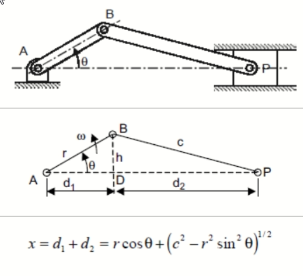
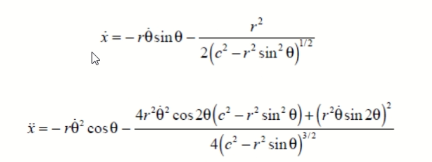

C:\Users\lucas\AppData\Local\Temp\ipykernel_16084\3331309431.py:18: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(disp, t)
C:\Users\lucas\AppData\Local\Temp\ipykernel_16084\3331309431.py:21: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(vel, t)


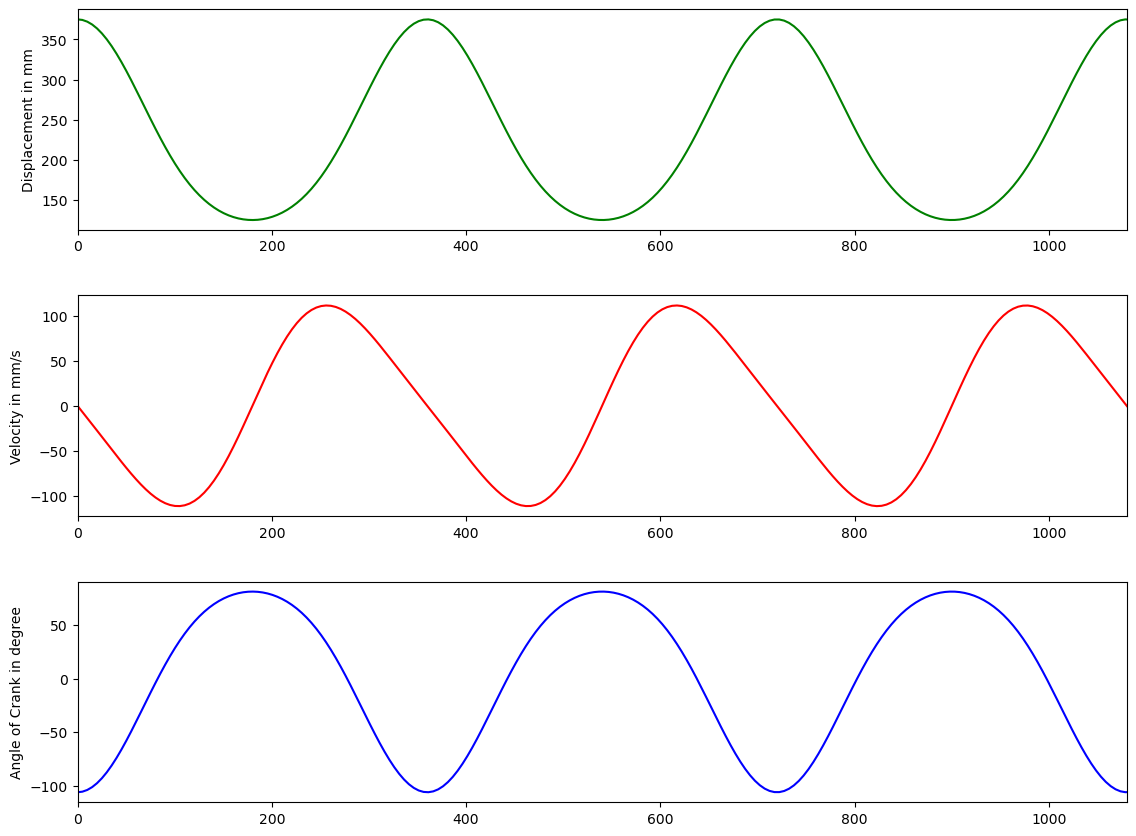

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, sin, cos

r = 125 # crank radius
c = 250 # connecting rod length

rpm = 500
omega = (2*pi*rpm)/60 # rad/sec

def disp(t):
    d1 = r*cos(omega*t)
    d2 =np.sqrt(c**2 - (r**2)*(sin(omega*t))**2)
    
    return d1+d2

def vel(t):
    return derivative(disp, t)

def acc(t):
    return derivative(vel, t)


time = np.linspace(0,0.5,300)
theta = omega*time*180/pi

x = disp(time)
v = vel(time)
a = acc(time)

plt.figure(figsize=(12,9))
plt.subplot(3,1,1)
plt.plot(theta,x,'g')
plt.ylabel('Displacement in mm')
plt.xlim(0,360*3)
plt.tight_layout(pad=3.0)

plt.subplot(3,1,2)
plt.plot(theta,v,'r')
plt.ylabel('Velocity in mm/s')
plt.xlim(0,360*3)
plt.tight_layout(pad=3.0)

plt.subplot(3,1,3)
plt.plot(theta,a,'b')
plt.ylabel('Angle of Crank in degree')
plt.xlim(0,360*3)
plt.tight_layout(pad=3.0)

plt.show()

In [94]:
from scipy.misc import derivative

def f(x):
    return x**3 + (4*x**2)-2

y = derivative(f,1, dx=0.001)
y


C:\Users\lucas\AppData\Local\Temp\ipykernel_16084\3807578706.py:6: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  y = derivative(f,1, dx=0.001)


11.000000999999315